In [156]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM,Dense
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from subprocess import check_output

In [157]:
data = pd.read_csv('./input/all_stocks_5yr.csv')
cl = data[data['Name']=='MMM'].close

In [158]:
def set_data(cl):
    scl = MinMaxScaler()
    #Scale the data
    # pandas.__version__ < 0.23
    # cl = cl.reshape(cl.shape[0],1)

    # pandas.__version__ => 0.23
    cl = cl.as_matrix()
    cl = cl.reshape(cl.shape[0],1)

    cl = scl.fit_transform(cl)
    return cl

In [159]:
cl = set_data(cl)

/Users/chjeong/.pyenv/versions/3.6.3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [160]:
cl.shape

(1259, 1)

In [161]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb)])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)

In [162]:
X, y = processData(cl,7)

In [163]:
print(X.shape)
print(y.shape)

(1251, 7, 1)
(1251,)


In [164]:
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
251
1000
251


In [165]:
#Build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(256,input_shape=(7,1)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

Train on 1000 samples, validate on 251 samples
Epoch 1/300
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0016 - val_loss: 0.0252
Epoch 2/300
1000/1000 [==============================] - 0s 463us/step - loss: 0.0070 - val_loss: 0.0013
Epoch 3/300
1000/1000 [==============================] - 0s 465us/step - loss: 0.0041 - val_loss: 0.0016
Epoch 4/300
1000/1000 [==============================] - 0s 465us/step - loss: 3.6253e-04 - val_loss: 0.0013
Epoch 5/300
1000/1000 [==============================] - 0s 462us/step - loss: 3.9055e-04 - val_loss: 8.6471e-04
Epoch 6/300
1000/1000 [==============================] - 0s 470us/step - loss: 6.3209e-04 - val_loss: 5.4998e-04
Epoch 7/300
1000/1000 [==============================] - 0s 470us/step - loss: 3.2980e-04 - val_loss: 8.8361e-04
Epoch 8/300
1000/1000 [==============================] - 0s 464us/step - loss: 3.6560e-04 - val_loss: 0.0011
Epoch 9/300
1000/1000 [==============================] - 0s 473us/step - loss: 6.03

1000/1000 [==============================] - 0s 465us/step - loss: 2.1816e-04 - val_loss: 0.0016
Epoch 76/300
1000/1000 [==============================] - 0s 446us/step - loss: 2.1780e-04 - val_loss: 0.0016
Epoch 77/300
1000/1000 [==============================] - 0s 455us/step - loss: 2.1692e-04 - val_loss: 0.0016
Epoch 78/300
1000/1000 [==============================] - 0s 454us/step - loss: 2.1549e-04 - val_loss: 0.0016
Epoch 79/300
1000/1000 [==============================] - 0s 453us/step - loss: 2.1453e-04 - val_loss: 0.0016
Epoch 80/300
1000/1000 [==============================] - 0s 447us/step - loss: 2.1253e-04 - val_loss: 0.0016
Epoch 81/300
1000/1000 [==============================] - 0s 449us/step - loss: 2.1170e-04 - val_loss: 0.0016
Epoch 82/300
1000/1000 [==============================] - 0s 451us/step - loss: 2.0959e-04 - val_loss: 0.0016
Epoch 83/300
1000/1000 [==============================] - 0s 447us/step - loss: 2.0884e-04 - val_loss: 0.0016
Epoch 84/300
1000/1000 

Epoch 149/300
1000/1000 [==============================] - 0s 453us/step - loss: 1.1175e-04 - val_loss: 7.0838e-04
Epoch 150/300
1000/1000 [==============================] - 0s 454us/step - loss: 1.1194e-04 - val_loss: 7.0533e-04
Epoch 151/300
1000/1000 [==============================] - 0s 446us/step - loss: 1.1220e-04 - val_loss: 7.0300e-04
Epoch 152/300
1000/1000 [==============================] - 0s 449us/step - loss: 1.1256e-04 - val_loss: 7.0146e-04
Epoch 153/300
1000/1000 [==============================] - 0s 449us/step - loss: 1.1302e-04 - val_loss: 7.0077e-04
Epoch 154/300
1000/1000 [==============================] - 0s 451us/step - loss: 1.1359e-04 - val_loss: 7.0099e-04
Epoch 155/300
1000/1000 [==============================] - 0s 456us/step - loss: 1.1426e-04 - val_loss: 7.0212e-04
Epoch 156/300
1000/1000 [==============================] - 0s 448us/step - loss: 1.1504e-04 - val_loss: 7.0413e-04
Epoch 157/300
1000/1000 [==============================] - 0s 458us/step - loss:

1000/1000 [==============================] - 0s 451us/step - loss: 1.3375e-04 - val_loss: 7.9017e-04
Epoch 221/300
1000/1000 [==============================] - 0s 450us/step - loss: 1.3361e-04 - val_loss: 7.8870e-04
Epoch 222/300
1000/1000 [==============================] - 0s 464us/step - loss: 1.3348e-04 - val_loss: 7.8729e-04
Epoch 223/300
1000/1000 [==============================] - 0s 447us/step - loss: 1.3335e-04 - val_loss: 7.8595e-04
Epoch 224/300
1000/1000 [==============================] - 0s 463us/step - loss: 1.3323e-04 - val_loss: 7.8471e-04
Epoch 225/300
1000/1000 [==============================] - 0s 460us/step - loss: 1.3311e-04 - val_loss: 7.8365e-04
Epoch 226/300
1000/1000 [==============================] - 0s 453us/step - loss: 1.3302e-04 - val_loss: 7.8296e-04
Epoch 227/300
1000/1000 [==============================] - 0s 453us/step - loss: 1.3298e-04 - val_loss: 7.8317e-04
Epoch 228/300
1000/1000 [==============================] - 0s 451us/step - loss: 1.3305e-04 - 

Epoch 292/300
1000/1000 [==============================] - 0s 451us/step - loss: 1.2094e-04 - val_loss: 7.1381e-04
Epoch 293/300
1000/1000 [==============================] - 0s 465us/step - loss: 1.2112e-04 - val_loss: 7.1725e-04
Epoch 294/300
1000/1000 [==============================] - 0s 453us/step - loss: 1.2124e-04 - val_loss: 7.2032e-04
Epoch 295/300
1000/1000 [==============================] - 0s 456us/step - loss: 1.2132e-04 - val_loss: 7.2304e-04
Epoch 296/300
1000/1000 [==============================] - 0s 450us/step - loss: 1.2138e-04 - val_loss: 7.2549e-04
Epoch 297/300
1000/1000 [==============================] - 0s 455us/step - loss: 1.2142e-04 - val_loss: 7.2769e-04
Epoch 298/300
1000/1000 [==============================] - 0s 457us/step - loss: 1.2145e-04 - val_loss: 7.2967e-04
Epoch 299/300
1000/1000 [==============================] - 0s 453us/step - loss: 1.2147e-04 - val_loss: 7.3144e-04
Epoch 300/300
1000/1000 [==============================] - 0s 451us/step - loss:

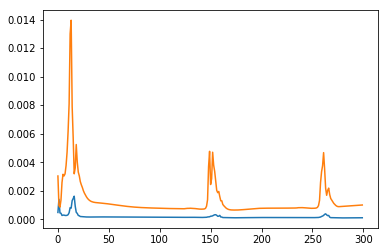

In [144]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [145]:
X_test[0]

array([[0.46959459, 0.47412787, 0.47781809],
       [0.46577002, 0.46725457, 0.46336961],
       [0.46800102, 0.47043185, 0.4655337 ],
       [0.46169046, 0.46556867, 0.45900961],
       [0.46717236, 0.46751394, 0.46235122],
       [0.46755482, 0.46783815, 0.46807969],
       [0.47176186, 0.47596875, 0.46935268]])

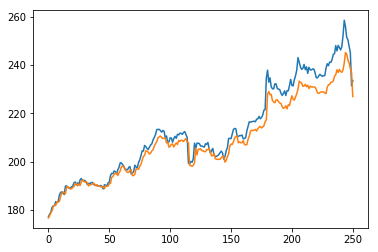

In [146]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [147]:
act = []
pred = []
#for i in range(250):
i=249
Xt = model.predict(X_test[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[237.01706]], actual:[[231.44]]


In [148]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

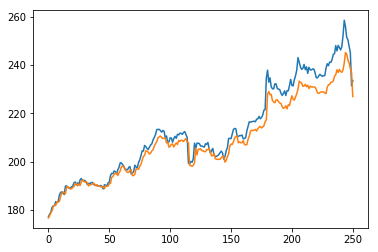

In [149]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [150]:
X_test[249]

array([[0.96003315, 0.94248476, 0.96836611],
       [1.        , 0.98327065, 1.        ],
       [0.98329934, 1.        , 0.99726306],
       [0.95480622, 0.97043185, 0.97403093],
       [0.94817695, 0.95869537, 0.95773662],
       [0.93185875, 0.93651602, 0.93838712],
       [0.91420194, 0.92808974, 0.92985806]])

In [151]:
X_test[248]

array([[0.93026517, 0.93697316, 0.92852142],
       [0.96003315, 0.94248476, 0.96836611],
       [1.        , 0.98327065, 1.        ],
       [0.98329934, 1.        , 0.99726306],
       [0.95480622, 0.97043185, 0.97403093],
       [0.94817695, 0.95869537, 0.95773662],
       [0.93185875, 0.93651602, 0.93838712]])